<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 8 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 27 October 2022, with material by John K. Kruschke</div>

# Bayesian Models in Sports Analytics

<br />
<center>
<img src="ipynb.images/more-sports.jpg" width=1000 />
</center>

In [1]:
import numpy as np
np.random.seed(0) # to keep it reproducible
import pymc3 as pm
import arviz as az
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# The binomial distribution
The [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $q=1-p$). 

A single success/failure experiment is also called a [Bernoulli trial](https://en.wikipedia.org/wiki/Bernoulli_trial) or Bernoulli experiment, and a sequence of outcomes is called a Bernoulli process; for a single trial, i.e., $n = 1$, the binomial distribution is a Bernoulli distribution. 

We usually model $p$ with a new distribution that we introduce today:

# The amazing Beta distribution
The Beta distribution models **probabilities**! Let's explore it some more.

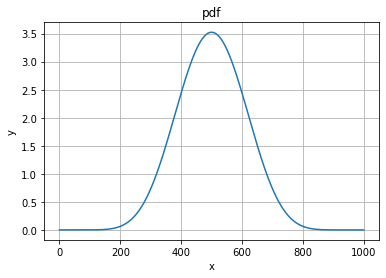

In [2]:
# prior parameters
alpha, beta = 10, 10

# calculate posterior distribution, using a beta distribution
variates = stats.beta(alpha, beta)

# beta distribution
xs = np.linspace(0, 1, num=1000)
pdf = variates.pdf(xs)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

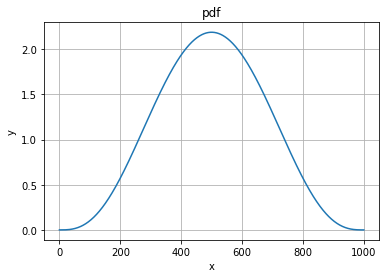

In [3]:
# prior parameters
alpha, beta = 4, 4

# calculate posterior distribution, using a beta distribution
variates = stats.beta(alpha, beta)

# beta distribution
xs = np.linspace(0, 1, num=1000)
pdf = variates.pdf(xs)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

If alpha and beta are unequal, there is a **bias**:

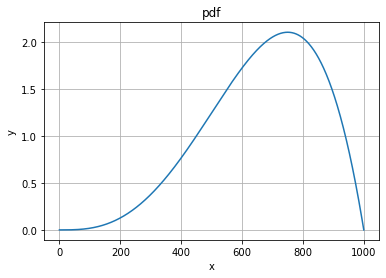

In [4]:
# prior parameters
alpha, beta = 4, 2

# calculate posterior distribution, using a beta distribution
variates = stats.beta(alpha, beta)

# beta distribution
xs = np.linspace(0, 1, num=1000)
pdf = variates.pdf(xs)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

As we continue decreasing alpha and beta, we move away from a bell-shaped curve:

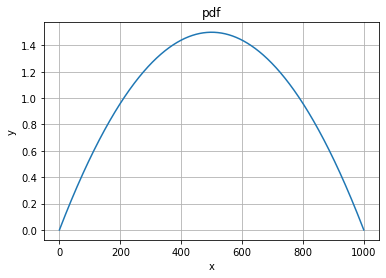

In [5]:
# prior parameters
alpha, beta = 2, 2

# calculate posterior distribution, using a beta distribution
variates = stats.beta(alpha, beta)

# beta distribution
xs = np.linspace(0, 1, num=1000)
pdf = variates.pdf(xs)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

...all the way to a **uniform** distribution!

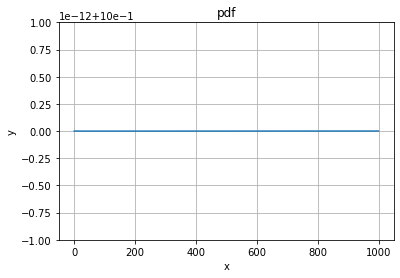

In [6]:
# prior parameters
alpha, beta = 1, 1

# calculate posterior distribution, using a beta distribution
variates = stats.beta(alpha, beta)

# beta distribution
xs = np.linspace(0, 1, num=1000)
pdf = variates.pdf(xs)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

But we can keep on going, too! Look what happens! 

How would you interpret this, probability-wise?

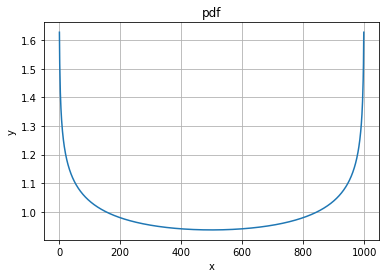

In [7]:
# prior parameters
alpha, beta = 0.9, 0.9

# calculate posterior distribution, using a beta distribution
variates = stats.beta(alpha, beta)

# beta distribution
xs = np.linspace(0, 1, num=1000)
pdf = variates.pdf(xs)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

Yup, that's right: A very high probability of producing a series of outcomes that are either close to all-heads, or all-tails!

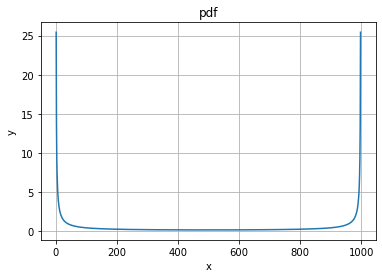

In [8]:
# prior parameters
alpha, beta = 0.1, 0.1

# calculate posterior distribution, using a beta distribution
variates = stats.beta(alpha, beta)

# beta distribution
xs = np.linspace(0, 1, num=1000)
pdf = variates.pdf(xs)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

# Example 1

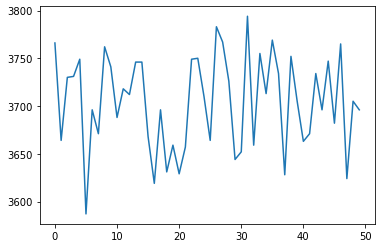

In [10]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from scipy.stats import binom

p_true = 0.37
n = 10000
K = 50

X = binom.rvs( n=n, p=p_true, size=K )
#print( X )
plt.plot(X)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

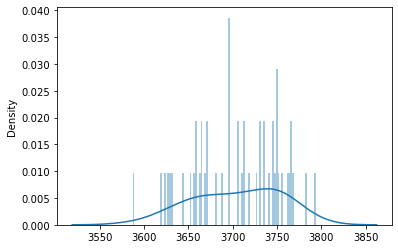

In [11]:
import seaborn as sns
sns.distplot(X ,bins=100)

C:\Users\HP\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 90 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\HP\AppData\Local\Temp\ipykernel_16172\3616881142.py:9: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot( trace )
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\HP\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


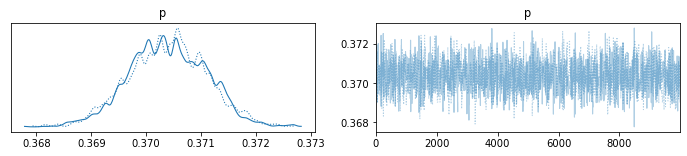

In [12]:
model = pm.Model()

with model:
    p = pm.Beta( 'p', alpha=2, beta=2 )
    y_obs = pm.Binomial( 'y_obs', p=p, n=n, observed=X )
    step = pm.Metropolis()
    trace = pm.sample( 10000, step=step, progressbar=True )

pm.traceplot( trace )
plt.show()

# Example 2
Let's assume we have some data from [independent and identically distributed random variable](Independent and identically distributed random variables) (*i.i.d.*) binomial trials and we want to estimate the probability of observing a 1.

>**Note**: The i.i.d. assumption is used in the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), which states that the probability distribution of the sum (or average) of i.i.d. variables with finite variance approaches a normal distribution.

>"*independent and identically distributed*" implies that an element in the sequence is independent of the random variables that came before it. In this way, an i.i.d. sequence is different from a Markov sequence, where the probability distribution for the nth random variable is a function of the previous random variable in the sequence (for a first order Markov sequence).

In [8]:
import scipy

#simulate some observations, 
theta_unk = 0.3 # unknown theta, that's the parameter we want to estimate
nb_data = n = 40
data = scipy.stats.bernoulli.rvs(theta_unk, size=nb_data)
print ("Data:", data)

k = data.sum()
print ("Suffient statistics:\n\t number of trails:",n, "\n\t number of positive outcomes:", k)
theta_ml = float(k)/float(n)
print ("Maximum likelihood estimate of theta:", theta_ml)

Data: [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1
 1 0 0]
Suffient statistics:
	 number of trails: 40 
	 number of positive outcomes: 11
Maximum likelihood estimate of theta: 0.275


## Choice of Prior
We choose the Beta distribution as a **flat prior** ($α=1$ and $β=1$):
```
theta = pymc.Beta('theta', alpha=1, beta=1)
```

If we would had put more prior (knowledge) in our model we could have used a Beta-Distribution with different parameters $α$, $β$, e.g.:
```
theta = pymc.Beta('theta', alpha=4., beta=8.)
```

## With Bernoulli Data Likelihood

In [9]:
import pymc3

In [10]:
# with bernoulli distribution
with pm.Model() as model: 
    theta = pymc3.Beta('theta', alpha=1, beta=1)
    bernoulli = pymc3.Bernoulli('bernoulli',p=theta, observed=data)

## With Binomial Data Likelihood
Alternatively we can use the sufficient statistics of the data D, i.e. $(k,n)$.

Our observed variable is then a Binomial random variable:
```
pymc3.Binomial('binominal', len(data), p, observed=np.sum(data))
```

In [19]:
# with binomial distribution
with pm.Model() as model: 
    p = pm.Beta('theta', alpha=1, beta=1)
    #n = len(data)
    #k = np.sum(data)
    binomial = pm.Binomial('binomial', len(data), p, observed=np.sum(data))

## Maximum A Posteriori Estimate
In Bayesian statistics, a [maximum a posteriori probability](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimate is an estimate of an unknown quantity that equals the mode of the posterior distribution. 

The MAP can be used to obtain a **point estimate** of an unobserved quantity on the basis of empirical data. It is closely related to the method of [maximum likelihood (ML) estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

In [20]:
map_estimate = pm.find_MAP(model=model)
map_estimate

logp = -4.5149, ||grad|| = 7: 100%|██████████| 7/7 [00:00<00:00, 19.78it/s]   


{'theta_logodds__': array(-0.73088751), 'theta': array(0.325)}

## Bayesian simulation
With a Bayesian simulation, we obtain full **pdf profiles** of simulated variables (what I call *quantum variables*), instead of *point estimates*. 

A pdf profiles yields *more information* than point estimates because it also gives us an idea of **uncertainty**, which is crucial in trusting machine algorithms in the age of Machine Learning.

In [21]:
with model:
    # draw 50000 posterior samples
    p_trace = pm.sample(50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 202000/202000 [04:56<00:00, 681.69draws/s] 
The acceptance probability does not match the target. It is 0.878936781059372, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8802152122182006, but should be close to 0.8. Try to increase the number of tuning steps.


In [22]:
theta_trace = p_trace['theta'][10000:]

Plotting the posterior theta, both as the trace of our simulation, and as the chose pdf profile with simulated parameters:

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


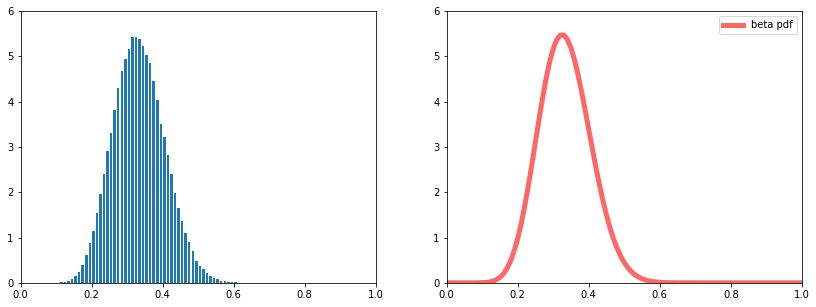

In [23]:
plt.figure(figsize=(14,5))

ax = plt.subplot(121)
hist, bins = np.histogram(theta_trace, bins=np.arange(0.,1.01,0.01), normed=True)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist, align='center', width=width)
plt.xlim([0., 1.0])
plt.ylim([0., 6.0])

ax = plt.subplot(122)
ax.plot(bins, scipy.stats.beta.pdf(bins, k+1, n-k+1), 'r-', lw=5, alpha=0.6, label='beta pdf')
plt.xlim([0., 1.0])
plt.ylim([0., 6.0])
plt.legend()
plt.show()

## Multiple realisations
Let's try with different sample sizes ($[20, 50, 100, 500]$), to observe how more and more data help us reduce uncertainty in our model:

In [ ]:
# with bernoulli distribution
def create_model_pymc3(data):
    with pm.Model() as model: 
        theta = pm.Beta('theta', alpha=1, beta=1)
        bernoulli = pm.Bernoulli('bernoulli',p=theta, observed=data)
    return model

In [34]:
# with binomial distribution
def create_model_pymc3(data):
    with pm.Model() as model: 
        theta = pm.Beta('theta', alpha=1, beta=1)
        # sufficient statistics
        n = len(data)
        k = np.sum(data)
        binominal = pm.Binomial('binominal', n, p=theta, observed=k)
    return model

In [35]:
import scipy
sample_size=30

def get_traces_pymc3(sample_size, theta_unk=.3):
    observed_data=scipy.stats.bernoulli.rvs(theta_unk, size=sample_size)
    model_pymc3 = create_model_pymc3(observed_data)
    with model_pymc3:
        # obtain starting values via MAP
        start = pm.find_MAP()
        # draw 10000 posterior samples
        trace = pm.sample(10000, start=start) 
    return trace.get_values('theta'), observed_data

In [36]:
from IPython.core.pylabtools import figsize
s = 0.8
figsize(11*s, 9*s)

n_samples = [20, 50, 100, 500]

def get_theta_histograms():    
    histograms = dict()
    data = dict()
    bins = np.arange(0.,1.01,0.01)
    for i, N in enumerate(n_samples):
        #prior_trace, observed_data = get_traces(N, theta_unk=theta_unk)
        prior_trace, observed_data = get_traces_pymc3(N, theta_unk=theta_unk)
        hist, bins = np.histogram(prior_trace, bins=bins)
        histograms[N] = hist
        data[N] = observed_data
    return histograms, bins, data

histograms, bins, data = get_theta_histograms()

logp = -4.2141, ||grad|| = 5: 100%|██████████| 6/6 [00:00<00:00, 2054.19it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:24<00:00, 1741.04draws/s]
The acceptance probability does not match the target. It is 0.8811719723780279, but should be close to 0.8. Try to increase the number of tuning steps.
logp = -7.0905, ||grad|| = 11: 100%|██████████| 6/6 [00:00<00:00, 3073.88it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:23<00:00, 1812.43draws/s]
The acceptance probability does not match the target. It is 0.878714150841571, but should be close to 0.8. Try to increase the number of tuning steps.
logp = -7.6884, ||grad|| = 16: 100%|██████████| 7/7 [00:00<00:00, 2362.23it/s]
Auto-assi

In [37]:
def plot_theta_histograms(histograms, bins, data):
    x = np.linspace(0, 1, 100)
    theta_unk = 0.3
    plt.figure(figsize=(10,16))
    for i, N in enumerate(n_samples):
        ax = plt.subplot(len(n_samples), 2, (i*2)+1)
        plt.setp(ax.get_yticklabels(), visible=False)
        hist = histograms[N]
        #np.histogram(prior_trace, bins=np.arange(0.,1.01,0.01))
        width = 0.7 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2
        ax.bar(center, hist, align='center', width=width)
        plt.xlim([0., 1.0])
        ax.set_xlabel("$theta$")
        ax.set_ylabel("$p(theta)$")
        
        ax = plt.subplot(len(n_samples), 2, (i*2) + 2)
        plt.setp(ax.get_yticklabels(), visible=False)
        observed_data = data[N]
        k = observed_data.sum(); n=len(observed_data)
        ax.plot(bins, scipy.stats.beta.pdf(bins, k+1, n-k+1), 'r-', lw=2, alpha=0.6, label='beta pdf')
        ax.set_xlabel("$theta$")
        ax.set_ylabel("$p(theta)$")
        
    plt.suptitle("MCMC sample histograms and exact solution for different $n$")
    #plt.legend()
    plt.show()

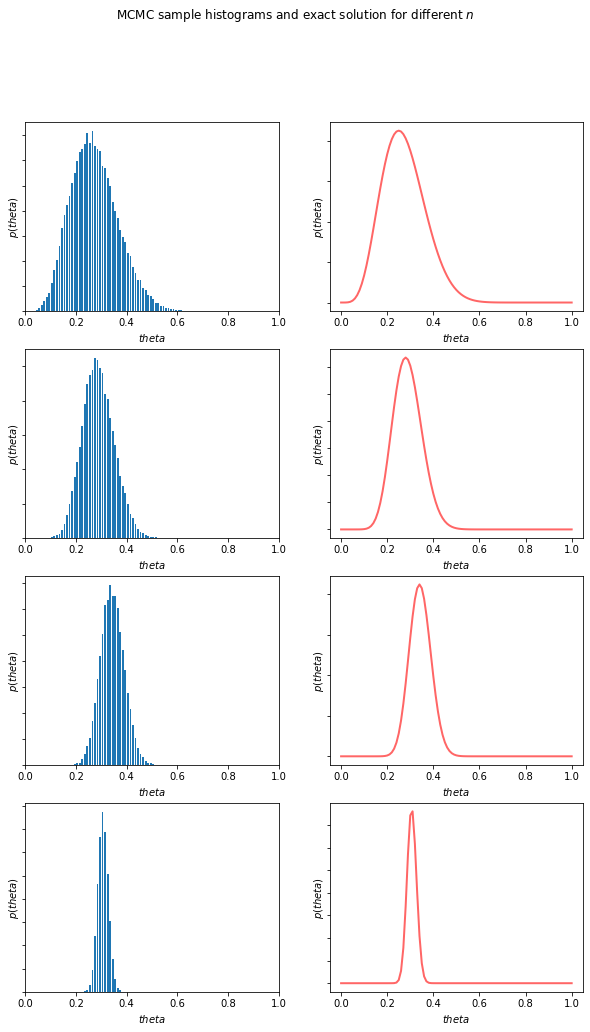

In [38]:
plot_theta_histograms(histograms, bins, data)

# Formula 1 Lab
Model Max Verstappen's and Lewis Hamilton's and the other top-10 F1 drivers' pdfs, starting with flat priors and using 2022 season results. Compare with our frequentist results.

# Reference

The [puppy dog book](https://www.amazon.com/Doing-Bayesian-Data-Analysis-Tutorial/dp/0124058884)!

[Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan](https://jkkweb.sitehost.iu.edu/DoingBayesianDataAnalysis/)

# HW Hint

A good option is the [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution). If $x$ measures rainfall:

<div style="font-size: 120%;">  
$$x \sim \gamma(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

The gamma distribution is often used to model the size of [insurance claims](https://www.crcpress.com/Statistical-and-Probabilistic-Methods-in-Actuarial-Science/Boland/p/book/9781584886952) and [rainfalls](http://journals.tubitak.gov.tr/engineerinhttp://localhost:8888/notebooks/f1-bayesian-dino-lab.ipynb#g/issues/muh-00-24-6/muh-24-6-7-9909-13.pdf). This means that aggregate insurance claims and the amount of rainfall accumulated in a reservoir are usually well modelled by a gamma process.

Data likelihood:
```
with rainfall_model:
    april_like = Gamma('april_like', alpha=ualpha, beta=ubeta, observed=precip.Apr)
```

Plotting the posterior of your gamma's parameters:
```
plot_posterior(rainfall_trace[100:], 
                varnames=['ualpha', 'ubeta'],
                color='#87ceeb');
```

Once you have a good model, you can now simulate rainfall:
```
from pymc3 import sample_ppc

with rainfall_model:
    rainfall_ppc = sample_ppc(rainfall_trace, 1000)
    
rainfall_ppc['april_like'].shape
```